<a href="https://colab.research.google.com/github/ImAli0/ImAli/blob/main/week7/Week7_lab1_1%2C1_2%2C1_3%2C1_4%2C1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data
Category:  8


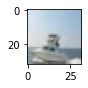

In [ ]:
import torchvision 
import torchvision.transforms as transforms 
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader 
import numpy as np 
import matplotlib.pyplot as plt

# Load training dataset into a single batch. 
transform = transforms.Compose([transforms.ToTensor()]) 
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform) 
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False) 
data = next(iter(trainloader)) 
# Convert to numpy arrays of correct shape for plotting. 
train_images = data[0].numpy() 
train_images = np.moveaxis(train_images, 1, 3) 
train_labels = data[1].numpy()

print('Category: ', train_labels[100]) 
plt.figure(figsize=(1, 1)) 
plt.imshow(train_images[100]) 
plt.show() 


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import requests 
url='https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r=requests.get(url)

with open('utilities.py','w') as f:
  f.write(r.text)

In [2]:
  import torch 
  import torch.nn as nn 
  import torchvision 
  import torchvision.transforms as transforms 
  from torchvision.datasets import CIFAR10 
  from torch.utils.data import DataLoader 
  import numpy as np 
  from utilities import train_model 
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu") 
EPOCHS = 128 
BATCH_SIZE = 32 
# Load training dataset into a single batch to compute mean and stddev. 
transform = transforms.Compose([transforms.ToTensor()]) 
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform) 
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False) 
data = next(iter(trainloader)) 
mean = data[0].mean() 
stddev = data[0].std() 


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data


In [3]:
transform=transforms.Compose( 
    [transforms.ToTensor(),
     transforms.Normalize(mean,stddev)])

trainset = CIFAR10(root='./pt_data', train=True, download=True,transform=transform) 
testset = CIFAR10(root='./pt_data', train=False, download=True,transform=transform)


model = nn. Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn. Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear (64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
layers = next (model.modules())
conv_layer0=layers[0]

conv_layer1=layers[2]

output_layer=layers[5]


nn.init.kaiming_normal_(conv_layer0.weight)

nn.init.constant(conv_layer0.bias,0.0)

nn.init.kaiming_normal_(conv_layer1.weight)

nn.init.constant (conv_layer1.bias, 0.0)

nn. init.xavier_uniform (output_layer.weight)

nn.init.constant (output_layer.bias, 0.0)

optimizer = torch.optim.Adam(model.parameters()) 
loss_function = nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


Epoch 1/128 loss: 1.4108 - acc: 0.5011 - val_loss: 1.1960 - val_acc: 0.5795
Epoch 2/128 loss: 1.0656 - acc: 0.6293 - val_loss: 1.0734 - val_acc: 0.6265
Epoch 3/128 loss: 0.9283 - acc: 0.6782 - val_loss: 1.0247 - val_acc: 0.6496
Epoch 4/128 loss: 0.8312 - acc: 0.7106 - val_loss: 1.0340 - val_acc: 0.6512
Epoch 5/128 loss: 0.7561 - acc: 0.7384 - val_loss: 1.1047 - val_acc: 0.6353
Epoch 6/128 loss: 0.6920 - acc: 0.7574 - val_loss: 1.0774 - val_acc: 0.6489
Epoch 7/128 loss: 0.6330 - acc: 0.7796 - val_loss: 1.1179 - val_acc: 0.6562
Epoch 8/128 loss: 0.5794 - acc: 0.7961 - val_loss: 1.1940 - val_acc: 0.6393
Epoch 9/128 loss: 0.5308 - acc: 0.8129 - val_loss: 1.2129 - val_acc: 0.6464
Epoch 10/128 loss: 0.4845 - acc: 0.8281 - val_loss: 1.3123 - val_acc: 0.6363
Epoch 11/128 loss: 0.4472 - acc: 0.8399 - val_loss: 1.3892 - val_acc: 0.6292
Epoch 12/128 loss: 0.4088 - acc: 0.8547 - val_loss: 1.4298 - val_acc: 0.6395
Epoch 13/128 loss: 0.3801 - acc: 0.8643 - val_loss: 1.5335 - val_acc: 0.6325
Epoch 14

[0.9766874600127959, 0.6109225239616614]